# TODO
* in association of students with ACM, filter for active students. They are already naturally filtered for students who have received >0 minutes of tutoring. Alternatively, define 'active' as a student who has received >200 mins tutoring.

# Next Steps/Cycle
1. decide attributes
    * dimensionality reduction, represent dataset with less data,but less transparency
    * all if I can norm/encode programatically, then research feature selection scoring methods
    * use intuition/attributes I know are important
* Decide what scoring method to best select attributes
* Create decision tree
* Test other targets (measures of ACM effectiveness)

# Analysis Questions
* visualize tutoring time against growth
* visualize O&C scores against growth
* visualize growth against test date (whether baseline came from prior year or from fall)
* do SYACMs have greater impact? do they have greater impact when working with the same students?

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
os.chdir(r'Z:\ChiPrivate\Chicago Reports and Evaluation\SY18\Eval Management\ACM_analysis')

# Load shaped tables

In [73]:
# Student-level: tutoring time sum by student-program and associated to staff id via sections
tut_time_df = pd.read_csv('time_on_task_2017-12-11.csv')
# Student-level: Assessment performance vs target, no student-staff associations
assmt_df = pd.read_csv('assessment_growth.csv')
# ACM-level: each coaching instance YTD
heatmaps_df = pd.read_csv('OC_clean.csv')
# ACM-level: coaching data aggregated and normed, up to Decembet
heatmaps_df_agg = pd.read_csv('OC_clean_agg.csv')
# survey_df = pd.read_csv('ACM_Q2_survey.csv')

In [74]:
# merge assessments to tutoring time (including student-staff associations)
assmt_df['Assessment Type'] = assmt_df['Assessment Type'].str.replace('NWEA - ELA', 'Tutoring: Literacy')
assmt_df['Assessment Type'] = assmt_df['Assessment Type'].str.replace('NWEA - MATH', 'Tutoring: Math')
assmt_df['Key'] = assmt_df['Student__c'] + assmt_df['Assessment Type']
del assmt_df['Student__c']
tut_time_df['Key'] = tut_time_df['Student__c'] + tut_time_df['Program__c_Name']
impact_df = assmt_df.merge(tut_time_df, on='Key')

In [75]:
# group to ACM level
impact_df = impact_df.groupby('Staff__c').agg(['mean', 'std', 'count'])
impact_df.columns = [' '.join(col).strip() for col in impact_df.columns.values]
impact_df.reset_index(inplace=True)

### Experimenting with Different Scoring methods to aggregate student performance by ACM
Place greater value on N students who met target, penalize for N students who missed. [Graph](https://academo.org/demos/3d-surface-plotter/?expression=1.3y%5E1.6-x%5E1.5&xRange=0%2C+12&yRange=0%2C+12&resolution=46)

In [145]:
impact_df['N Hit Target'] = impact_df['Hit_Target? mean'] * impact_df['Hit_Target? count']
impact_df['N Not Hit Target'] = impact_df['Hit_Target? count'] - impact_df['N Hit Target']
impact_df['Score'] = 1.3*impact_df['N Hit Target']**1.6 - impact_df['N Not Hit Target']**1.5

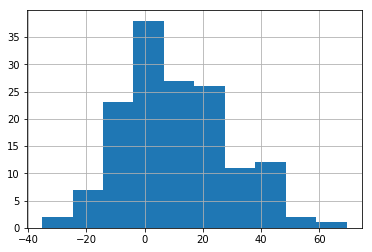

In [146]:
impact_df['Score'].hist()

In [147]:
impact_df['Score'] = (impact_df['Score'] - impact_df['Score'].mean()) / impact_df['Score'].std()

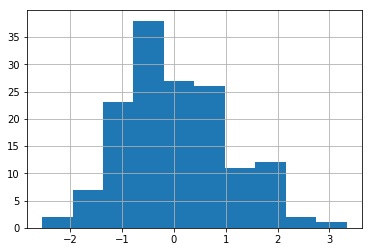

In [148]:
impact_df['Score'].hist()

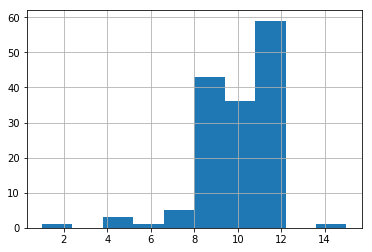

In [93]:
# focus list sizes
impact_df['Amount_of_Time__c_YTD count'].hist()

In [ ]:
(N students Grew / N students tutored ) * (N students tutored)^X

In [90]:
len(tut_time_df.loc[tut_time_df.Amount_of_Time__c_YTD<200])

439

In [4]:
# mean_df.reset_index(inplace=True)
# df = mean_df.merge(survey_df, on='Staff__c')

In [58]:
# from sklearn_pandas import DataFrameMapper
# import numpy as np
# import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_selection import SelectKBest, chi2

# mapper = DataFrameMapper([('NPS', sklearn.preprocessing.LabelBinarizer()),
#                           ('Growth_v_Target mean', None)], df_out=True)

# mapper

# mapper_fs = DataFrameMapper([(['children','salary'], SelectKBest(chi2, k=1))])
# mapper_fs.fit_transform(data[['children','salary']], data['Growth_v_Target mean'])

# from sklearn import tree

# X = [[0, 0], [1, 1]]
# Y = [0, 1]
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)

In [ ]:
sns.jointplot(x=("Hit_Target?", "mean"), y=("Amount_of_Time__c_YTD", "mean"), data=mean_df, kind="kde")

In [ ]:
sns.jointplot(x=("Growth_v_Target", "mean"), y=("Amount_of_Time__c_YTD", "mean"), data=mean_df, kind="kde", xlim=(-20, 20), ylim=(0, 1200))

In [ ]:
mean_df[("Growth_v_Target", "mean")].hist()

In [ ]:
mean_df[("Hit_Target?", "mean")].hist()

# Compare O&C to Target

In [142]:
oc_df = heatmaps_df_agg.merge(impact_df[['Staff__c', 'Score', 'Hit_Target? mean']], on='Staff__c')

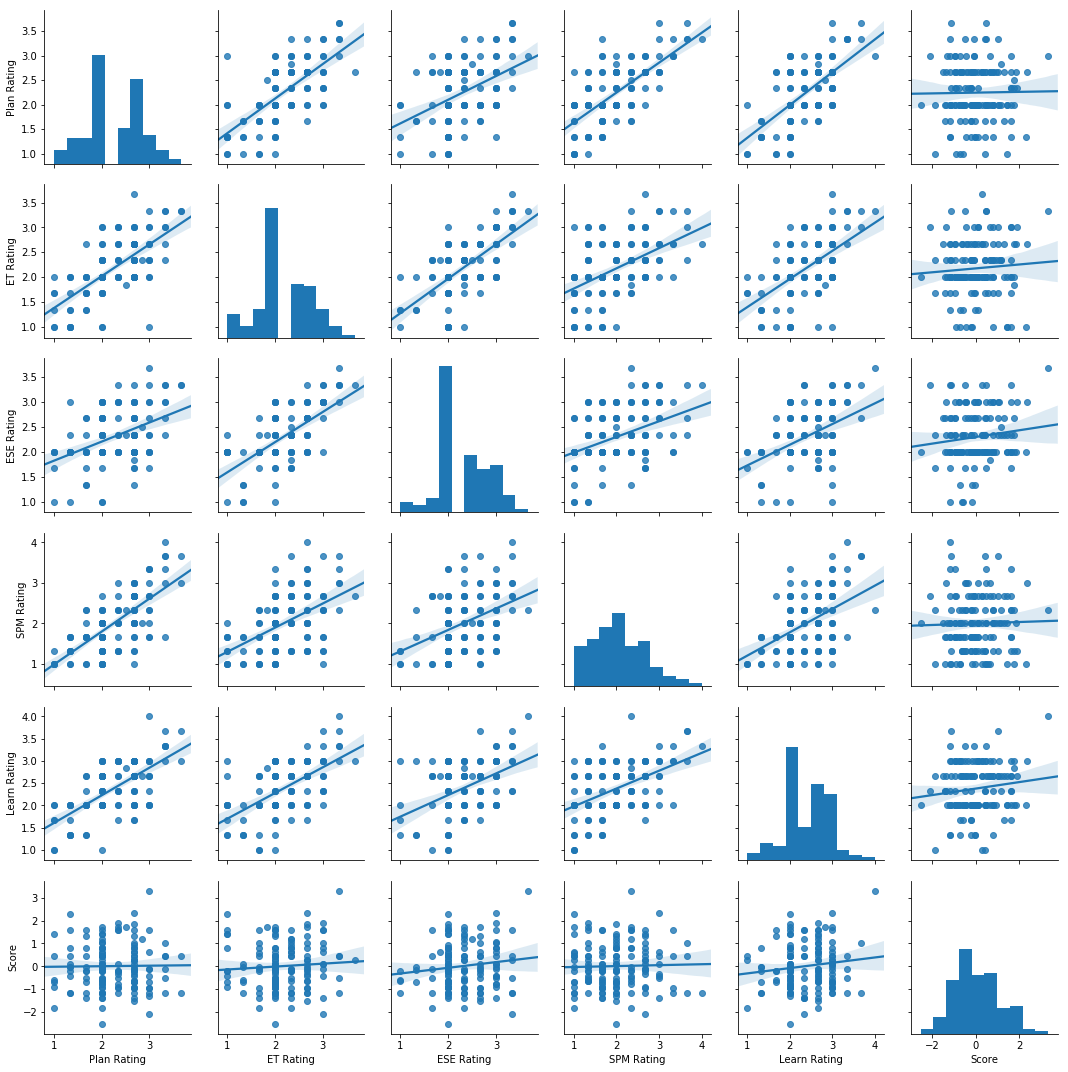

In [136]:
sns.pairplot(oc_df[[col for col in oc_df.columns if '_norm' not in col]], kind="reg")

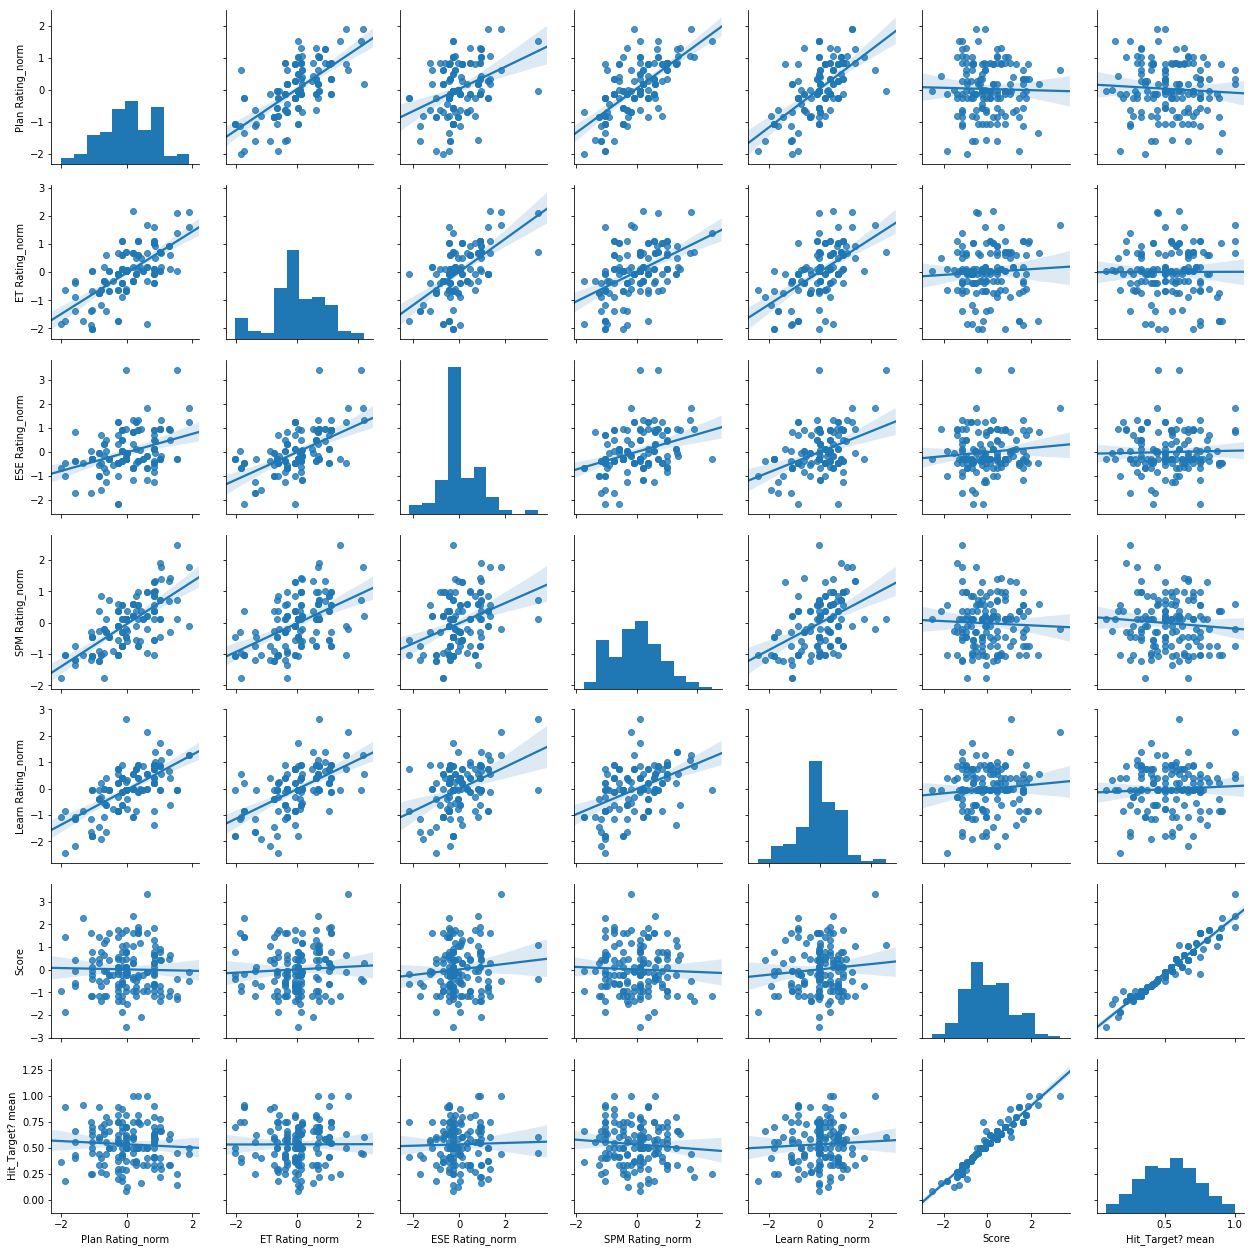

In [144]:
sns.pairplot(oc_df[[col for col in oc_df.columns if '_norm' in col] + ['Score', 'Hit_Target? mean']], kind="reg")